In [1]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [5]:
data=pd.read_csv('Heart_Disease_Dataset.csv')

In [7]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Female,25-29,White,Yes,Yes,Fair,17.1,Yes,Yes,Yes
1,Yes,36.93,Yes,Yes,No,3,10,No,Female,30-34,Hispanic,"No, borderline diabetes",Yes,Poor,2.7,Yes,No,No
2,No,18.70,Yes,No,Yes,26,15,No,Male,70-74,Hispanic,No,No,Poor,15.6,Yes,Yes,Yes
3,Yes,31.43,Yes,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,"No, borderline diabetes",No,Fair,1.4,No,No,Yes
4,Yes,75.64,No,No,Yes,2,29,No,Male,35-39,White,No,Yes,Excellent,8.8,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11456,Yes,30.65,Yes,Yes,No,28,5,No,Female,40-44,Hispanic,"No, borderline diabetes",Yes,Very good,15.1,Yes,No,No
11457,Yes,24.73,No,Yes,Yes,12,4,Yes,Male,18-24,Asian,Yes (during pregnancy),No,Fair,17.8,Yes,No,Yes
11458,No,36.89,No,No,No,0,26,Yes,Female,25-29,Hispanic,Yes (during pregnancy),No,Fair,18.5,No,Yes,Yes
11459,No,65.39,No,No,Yes,4,22,Yes,Male,35-39,American Indian/Alaskan Native,"No, borderline diabetes",Yes,Good,13.8,Yes,No,Yes


In [9]:

data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
11456,Yes,30.65,Yes,Yes,No,28,5,No,Female,40-44,Hispanic,"No, borderline diabetes",Yes,Very good,15.1,Yes,No,No
11457,Yes,24.73,No,Yes,Yes,12,4,Yes,Male,18-24,Asian,Yes (during pregnancy),No,Fair,17.8,Yes,No,Yes
11458,No,36.89,No,No,No,0,26,Yes,Female,25-29,Hispanic,Yes (during pregnancy),No,Fair,18.5,No,Yes,Yes
11459,No,65.39,No,No,Yes,4,22,Yes,Male,35-39,American Indian/Alaskan Native,"No, borderline diabetes",Yes,Good,13.8,Yes,No,Yes
11460,Yes,53.35,Yes,No,No,29,17,Yes,Male,35-39,Black,Yes,Yes,Very good,8.0,NaN,NaN,NaN


In [11]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Female,25-29,White,Yes,Yes,Fair,17.1,Yes,Yes,Yes
1,Yes,36.93,Yes,Yes,No,3,10,No,Female,30-34,Hispanic,"No, borderline diabetes",Yes,Poor,2.7,Yes,No,No
2,No,18.70,Yes,No,Yes,26,15,No,Male,70-74,Hispanic,No,No,Poor,15.6,Yes,Yes,Yes
3,Yes,31.43,Yes,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,"No, borderline diabetes",No,Fair,1.4,No,No,Yes
4,Yes,75.64,No,No,Yes,2,29,No,Male,35-39,White,No,Yes,Excellent,8.8,Yes,Yes,Yes


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11461 entries, 0 to 11460
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      11461 non-null  object 
 1   BMI               11461 non-null  float64
 2   Smoking           11461 non-null  object 
 3   AlcoholDrinking   11461 non-null  object 
 4   Stroke            11461 non-null  object 
 5   PhysicalHealth    11461 non-null  int64  
 6   MentalHealth      11461 non-null  int64  
 7   DiffWalking       11461 non-null  object 
 8   Sex               11461 non-null  object 
 9   AgeCategory       11461 non-null  object 
 10  Race              11461 non-null  object 
 11  Diabetic          11461 non-null  object 
 12  PhysicalActivity  11461 non-null  object 
 13  GenHealth         11461 non-null  object 
 14  SleepTime         11461 non-null  float64
 15  Asthma            11460 non-null  object 
 16  KidneyDisease     11460 non-null  object

In [15]:
data.shape

(11461, 18)

In [17]:
data.describe() # statistical analysis

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,11461.000000,11461.000000,11461.000000,11461.000000
mean,53.455746,14.612687,14.454760,12.415426
std,24.029634,8.683487,8.646256,6.612223
min,12.030000,0.000000,0.000000,1.000000
25%,32.690000,7.000000,7.000000,6.700000
50%,53.730000,15.000000,14.000000,12.400000
75%,74.470000,22.000000,22.000000,18.100000
max,94.850000,29.000000,29.000000,24.000000


In [19]:
data.count()

HeartDisease        11461
BMI                 11461
Smoking             11461
AlcoholDrinking     11461
Stroke              11461
PhysicalHealth      11461
MentalHealth        11461
DiffWalking         11461
Sex                 11461
AgeCategory         11461
Race                11461
Diabetic            11461
PhysicalActivity    11461
GenHealth           11461
SleepTime           11461
Asthma              11460
KidneyDisease       11460
SkinCancer          11460
dtype: int64

In [21]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              1
KidneyDisease       1
SkinCancer          1
dtype: int64

In [23]:
data.duplicated

<bound method DataFrame.duplicated of       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0              Yes  14.96     Yes             Yes     No               7   
1              Yes  36.93     Yes             Yes     No               3   
2               No  18.70     Yes              No    Yes              26   
3              Yes  31.43     Yes             Yes    Yes              24   
4              Yes  75.64      No              No    Yes               2   
...            ...    ...     ...             ...    ...             ...   
11456          Yes  30.65     Yes             Yes     No              28   
11457          Yes  24.73      No             Yes    Yes              12   
11458           No  36.89      No              No     No               0   
11459           No  65.39      No              No    Yes               4   
11460          Yes  53.35     Yes              No     No              29   

       MentalHealth DiffWalking     Sex AgeCatego

In [25]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11456    False
11457    False
11458    False
11459    False
11460    False
Length: 11461, dtype: bool

In [27]:
len(data[data.duplicated()])

0

In [29]:
for column in data.columns:
    print(data[column].value_counts())


HeartDisease
Yes    5777
No     5684
Name: count, dtype: int64
BMI
67.95    8
53.60    7
43.94    7
90.39    7
70.65    7
        ..
50.55    1
32.20    1
18.23    1
44.22    1
53.35    1
Name: count, Length: 6163, dtype: int64
Smoking
Yes    5819
No     5642
Name: count, dtype: int64
AlcoholDrinking
No     5796
Yes    5665
Name: count, dtype: int64
Stroke
No     5734
Yes    5727
Name: count, dtype: int64
PhysicalHealth
23    418
26    410
9     409
2     408
8     405
20    402
27    402
21    398
16    398
14    396
18    390
25    388
1     386
6     385
24    385
19    384
28    382
29    381
5     373
12    373
0     369
11    367
3     364
4     363
15    362
7     361
13    361
17    358
22    343
10    340
Name: count, dtype: int64
MentalHealth
26    413
18    407
7     407
16    406
25    402
11    400
13    398
12    395
8     394
4     388
6     387
21    387
0     385
22    383
3     382
5     380
1     379
29    378
2     377
28    376
20    374
14    373
10    373
15    3

In [31]:
data=pd.get_dummies(data,columns=['Smoking'],drop_first=True)
data.head()

,HeartDisease,BMI,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Smoking_Yes
0,Yes,14.96,Yes,No,7,6,Yes,Female,25-29,White,Yes,Yes,Fair,17.1,Yes,Yes,Yes,True
1,Yes,36.93,Yes,No,3,10,No,Female,30-34,Hispanic,"No, borderline diabetes",Yes,Poor,2.7,Yes,No,No,True
2,No,18.70,No,Yes,26,15,No,Male,70-74,Hispanic,No,No,Poor,15.6,Yes,Yes,Yes,True
3,Yes,31.43,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,"No, borderline diabetes",No,Fair,1.4,No,No,Yes,True
4,Yes,75.64,No,Yes,2,29,No,Male,35-39,White,No,Yes,Excellent,8.8,Yes,Yes,Yes,False


In [33]:
binary_columns=["AlcoholDrinking","Diabetic","PhysicalHealth","MentalHealth","DiffWalking","Sex","AgeCategory","Race","Diabetic","PhysicalActivity","GenHealth","Asthma","KidneyDisease","SkinCancer"]
for col in binary_columns:
    data[col]=data[col].map({'Yes':1,"No":0})

In [35]:
data.head()

,HeartDisease,BMI,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Smoking_Yes
0,Yes,14.96,1,No,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,17.1,1.0,1.0,1.0,True
1,Yes,36.93,1,No,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,2.7,1.0,0.0,0.0,True
2,No,18.70,0,Yes,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,15.6,1.0,1.0,1.0,True
3,Yes,31.43,1,Yes,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,1.4,0.0,0.0,1.0,True
4,Yes,75.64,0,Yes,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,8.8,1.0,1.0,1.0,False


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
AUC-ROC: 1.00


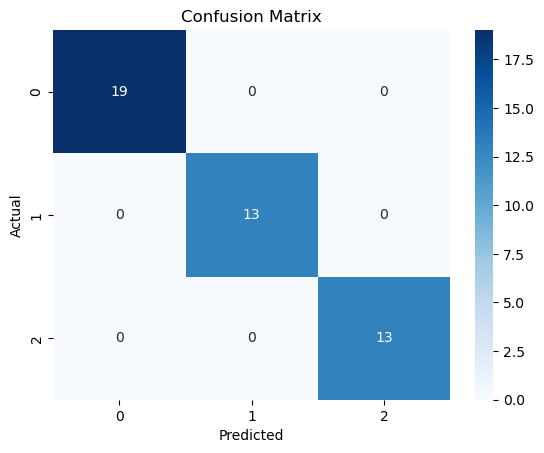

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load dataset and split into training and test sets
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
%%writefile app1.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load and preprocess the dataset
data = pd.read_csv('/content/Heart_Disease_Dataset.csv')  # Replace with your actual dataset path

# Preprocessing steps
binary_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for col in binary_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['Sex', 'AgeCategory', 'Race', 'GenHealth', 'Diabetic'], drop_first=True)

# Define features and target
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease'].map({'Yes': 1, 'No': 0})

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Function to make predictions
def predict_heart_disease(input_data):
    # Create a DataFrame with the input data
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Ensure all columns are present (fill missing columns with 0)
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reorder columns to match the model's expectations
    input_df = input_df[X.columns]

    # Make prediction
    prediction = clf.predict(input_df)
    return "Yes" if prediction[0] == 1 else "No"

# Streamlit app
st.title("Heart Disease Prediction")

# Input fields
bmi = st.number_input("BMI", min_value=0.0, max_value=100.0, value=25.0)
smoking = st.selectbox("Smoking", [0, 1])
alcohol_drinking = st.selectbox("Alcohol Drinking", [0, 1])
stroke = st.selectbox("Stroke", [0, 1])
physical_health = st.number_input("Physical Health (Days Not Good in Past 30)", min_value=0, max_value=30, value=0)
mental_health = st.number_input("Mental Health (Days Not Good in Past 30)", min_value=0, max_value=30, value=0)
diff_walking = st.selectbox("Difficulty Walking", [0, 1])
sex = st.selectbox("Sex", ["Female", "Male"])
age_category = st.selectbox("Age Category", ["25-29", "30-34", "35-39", "40-44", "50-54", "70-74"])
race = st.selectbox("Race", ["White", "Hispanic", "Black", "Asian", "American Indian/Alaskan Native"])
diabetic = st.selectbox("Diabetic Status", ["No", "No, borderline diabetes", "Yes (during pregnancy)", "Yes"])
physical_activity = st.selectbox("Physical Activity", [0, 1])
gen_health = st.selectbox("General Health", ["Poor", "Fair", "Good", "Very Good", "Excellent"])
sleep_time = st.number_input("Sleep Time (Hours)", min_value=0, max_value=24, value=7)
asthma = st.selectbox("Asthma", [0, 1])
kidney_disease = st.selectbox("Kidney Disease", [0, 1])
skin_cancer = st.selectbox("Skin Cancer", [0, 1])

# Prepare input data
input_data = {
    'BMI': bmi,
    'Smoking': smoking,
    'AlcoholDrinking': alcohol_drinking,
    'Stroke': stroke,
    'PhysicalHealth': physical_health,
    'MentalHealth': mental_health,
    'DiffWalking': diff_walking,
    'Sex_Male': 1 if sex == "Male" else 0,
    'AgeCategory_30-34': 1 if age_category == "30-34" else 0,
    'AgeCategory_35-39': 1 if age_category == "35-39" else 0,
    'AgeCategory_40-44': 1 if age_category == "40-44" else 0,
    'AgeCategory_50-54': 1 if age_category == "50-54" else 0,
    'AgeCategory_70-74': 1 if age_category == "70-74" else 0,
    'Race_Hispanic': 1 if race == "Hispanic" else 0,
    'Race_Black': 1 if race == "Black" else 0,
    'Race_Asian': 1 if race == "Asian" else 0,
    'Race_American Indian/Alaskan Native': 1 if race == "American Indian/Alaskan Native" else 0,
    'Diabetic_No, borderline diabetes': 1 if diabetic == "No, borderline diabetes" else 0,
    'Diabetic_Yes (during pregnancy)': 1 if diabetic == "Yes (during pregnancy)" else 0,
    'Diabetic_Yes': 1 if diabetic == "Yes" else 0,
    'PhysicalActivity': physical_activity,
    'GenHealth_Fair': 1 if gen_health == "Fair" else 0,
    'GenHealth_Good': 1 if gen_health == "Good" else 0,
    'GenHealth_Very Good': 1 if gen_health == "Very Good" else 0,
    'GenHealth_Excellent': 1 if gen_health == "Excellent" else 0,
    'SleepTime': sleep_time,
    'Asthma': asthma,
    'KidneyDisease': kidney_disease,
    'SkinCancer': skin_cancer
}

# Predict button
if st.button("Predict"):
    result = predict_heart_disease(input_data)
    st.write(f"Heart Disease Prediction: {result}")

Writing app1.py


In [ ]:
! streamlit run app1.py